In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from yellowbrick.classifier import ConfusionMatrix

In [64]:
base = pd.read_csv("mt_cars.csv")
base = base.drop(columns=['Unnamed: 0'])
base

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


# Nova seção

In [65]:
# y - Variável dependente
y = base['cyl'].values

# X - Variáveis independentes
X = base[['mpg', 'hp']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [66]:
knn = KNeighborsClassifier(n_neighbors=3)
model = knn.fit(X_train, y_train)

In [67]:
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

# Average define como é feito o cálculo da métrica do modelo, por exemplo:
# None - Calcula a métrica de cada classe (precisão de cada uma das 4 classes no exemplo)
# Weighted - Calcula a métrica de todas as classes juntas utilizando o peso dela em relação as demais
precision = precision_score(y_test, predictions, average=None)
precision_weighted = precision_score(y_test, predictions, average='weighted')

recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
print(f'accuracy = {accuracy} \nprecision = {precision} \nprecision_weighted = {precision_weighted} \nrecall = {recall} \nf1 = {f1}\n')

report = classification_report(y_test, predictions)
print(report)

accuracy = 0.9 
precision = [1.  0.5 1. ] 
precision_weighted = 0.95 
recall = 0.9 
f1 = 0.9095238095238095

              precision    recall  f1-score   support

           4       1.00      0.75      0.86         4
           6       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         5

    accuracy                           0.90        10
   macro avg       0.83      0.92      0.84        10
weighted avg       0.95      0.90      0.91        10



/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


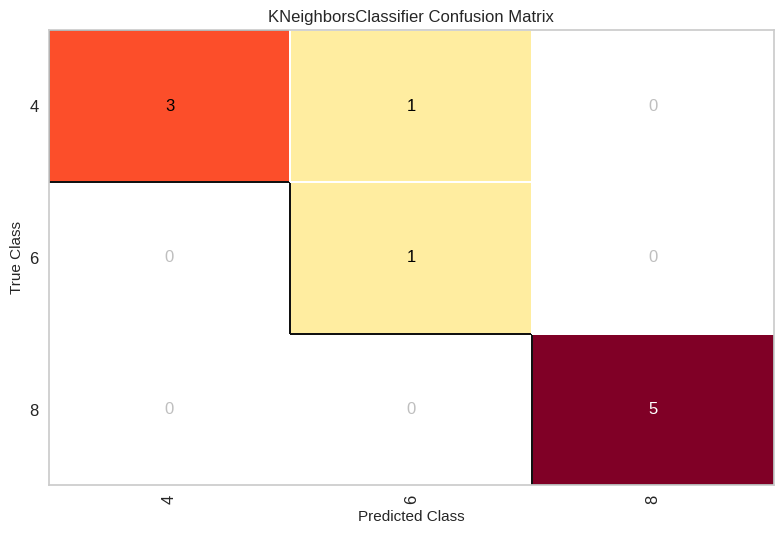

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [68]:
confusion_matrix = ConfusionMatrix(model)
confusion_matrix.score(X_test, y_test)
confusion_matrix.poof()

In [72]:
# mpg, hp
new_data = np.array([[19.3, 105]])

new_predict = model.predict(new_data)

distance, indexes = model.kneighbors(new_data)

# cyl
print(f"cyl = {new_predict} \ndistance = {distance} \nindexes = {indexes}")
base.iloc[indexes[0]]

cyl = [6] 
distance = [[1.2        4.5177428  5.28109837]] 
indexes = [[21 15 11]]


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
21,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
15,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
11,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
